# Task
## Classify distal phalanges of fingerprints from non-distal phalanges of fingerprints and toe prints with 95%+ accuracy

## Instructions:
#### Run 'pip3 install -r requirements.txt' on your command line before running this file. This will download all the required libraries in your system

### Importing all the Libraries

In [7]:
import os
import argparse

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import confusion_matrix
import seaborn as sn

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.autograd import Variable
from torchvision.utils import save_image

### Fingerprints before cropping

In [2]:
img11=mpimg.imread('Annotated_data/images/L_0.png')
img12=mpimg.imread('Annotated_data/images/R_0.png')
img13=mpimg.imread('Annotated_data/Processed_images/Thumb_images/new_images/T_0.png')


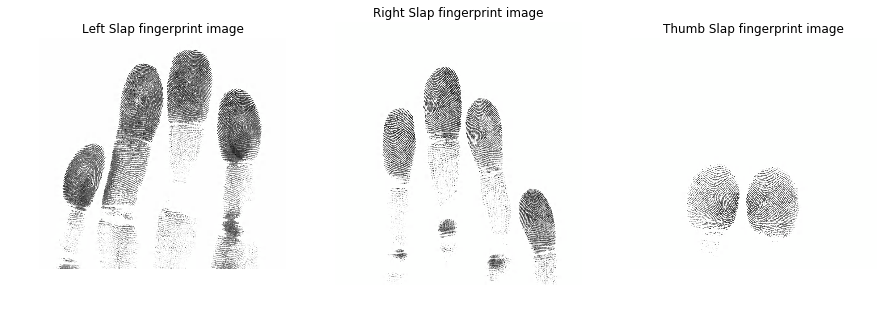

In [3]:
fig, axes = plt.subplots(1,3,figsize=(15,15))
axes[0].imshow(img11, cmap="gray")
axes[0].axis('off')
axes[0].set_title("Left Slap fingerprint image")
axes[1].imshow(img12, cmap="gray")
axes[1].set_title("Right Slap fingerprint image")
axes[1].axis("off")
axes[2].imshow(img13, cmap="gray")
axes[2].set_title("Thumb Slap fingerprint image")
axes[2].axis("off")
plt.show()

### Distal and non distal phalanges after cropping

In [4]:
img1=mpimg.imread('nist_test_data/distal/0_L_R_103.png')
img2=mpimg.imread('nist_test_data/non_distal/4_L_R_103.png')
img3=mpimg.imread('train_data/distal/0_L_0.png')
img4=mpimg.imread('train_data/non_distal/4_L_30.png')
img5=mpimg.imread('train_data/non_distal/001.png')
img6=mpimg.imread('train_data/non_distal/002.png')


FileNotFoundError: [Errno 2] No such file or directory: 'train_data/distal/0_L_0.png'

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(15,15))
axes[0, 0].imshow(img1, cmap="gray")
axes[0, 0].axis('off')
axes[0, 0].set_title("NIST distal image")
axes[0, 1].imshow(img2, cmap="gray")
axes[0, 1].set_title("NIST non distal/intermediate image")
axes[0, 1].axis("off")
axes[1, 0].imshow(img3, cmap="gray")
axes[1, 0].set_title("Lab data distal image")
axes[1, 0].axis("off")
axes[1, 1].imshow(img4, cmap="gray")
axes[1, 1].set_title("Lab data non distal/ intermediate image")
axes[1, 1].axis("off")
axes[2, 0].imshow(img5, cmap="gray")
axes[2, 0].set_title("Toe print")
axes[2, 0].axis("off")
axes[2, 1].imshow(img6, cmap="gray")
axes[2, 1].set_title("Toe print")
axes[2, 1].axis("off")
plt.show()

### Note:
#### Clarity of toe prints and nist dataset is better than our lab's dataset. We are performing the tests on ouw own dataset so that the accuracy we get is as close as possible to the real world results

## Results

In [ ]:
img=mpimg.imread('results_0.0001_80_mobilenet_v2.png')
plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray')
plt.title("Training and Validation loss curves")
plt.axis("off")
plt.show()

## Implementation Details
##### Binary classification of distal and non-distal
##### Model used: MobileNet v2
##### Learning Rate: 0.0001
##### Epochs: 50
##### Data used for training: NIST Dataset
##### Data used for testing: Our own dataset

In [8]:
model = "mobilenet_v2"
test_data = "nist_test_data/"
pth = "fingermodel_bal_0.0001_80_mobilenet_v2.pth"

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() 
                                  else "cpu")
model = torch.hub.load('pytorch/vision:v0.5.0', model, pretrained=False, num_classes=2)
model.to(device)
model.load_state_dict(torch.load(pth, map_location=device))

model.eval()

Using cache found in C:\Users\Tushar/.cache\torch\hub\pytorch_vision_v0.5.0


MobileNetV2(
  (features): Sequential(
    (0): ConvBNReLU(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=Tr

In [10]:
test_transforms = transforms.Compose([transforms.Resize([224,224]),transforms.ToTensor(),transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
data = datasets.ImageFolder(test_data, transform = test_transforms)
classes = data.classes
print(classes, "cls")
loader = torch.utils.data.DataLoader(data, batch_size=1)

['distal', 'non_distal'] cls


In [11]:
def predict_image(image):
    image_tensor = image
    image_tensor = image_tensor.to(device)
    output = model(image_tensor)
    index = output.data.cpu().numpy().argmax(axis=1)
    return index

In [12]:
import time
begin = time.time()
index_list = []
indexes_list=[]
labels_list = []
count=0
counter=[]
output=[]
c=0
for ii,(images,labels) in enumerate(loader):
    labels_list.append(labels)
    index= predict_image(images)
    ls = index[0]
    index_list.append(index)
    indexes_list.append(ls)
    #print(index[0])
    #print(labels.cpu().numpy()[0], "lab")
    res = labels.cpu().numpy()[0] == index[0]
    #print(labels[0])
    #save_image(images, os.path.join(results_dir,'image_'+str(ii)+'_'+str(classes[index[0]])+'_'+str(res)+'.png'))
    #print(res)
    if res:
        c = c+1

    count+=1
    counter.append(count)
end = time.time()
print(end-begin)

219.1340548992157


In [13]:
indices = np.concatenate(index_list, axis = 0)
labels = torch.cat(labels_list, dim = 0).cpu().numpy().astype(np.int32)
accuracy = (indices == labels).sum()/labels.shape[0]*100

print("The accuracy is ", accuracy)

The accuracy is  98.58239810986414


In [14]:
array = confusion_matrix(labels_list, index_list)
print(array)

[[1648   10]
 [  38 1690]]


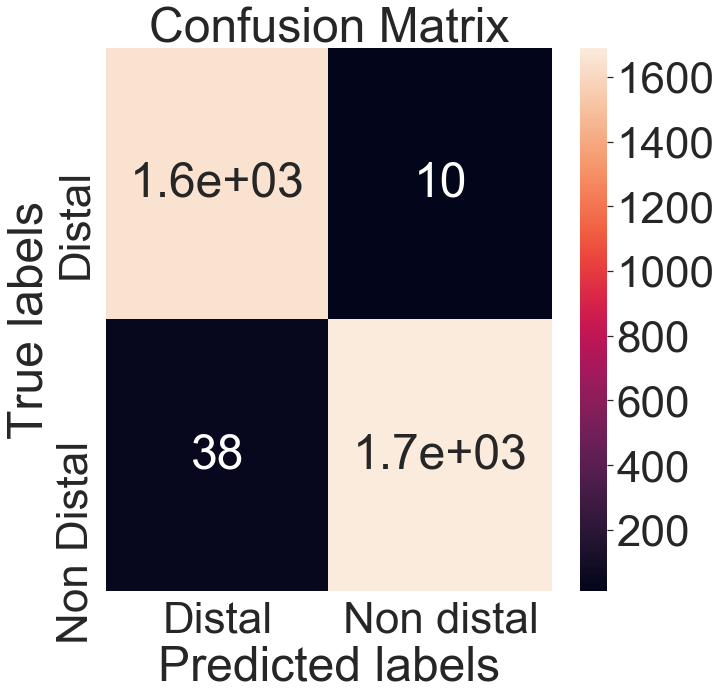

In [15]:
plt.figure(figsize=(10,10))
ax= plt.subplot()
sn.set(font_scale=4.0)

sn.heatmap(array, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Distal', 'Non distal']); ax.yaxis.set_ticklabels(['Distal', 'Non Distal'])
plt.show()

# Final Observations:
#### The following model produces a test accuracy of 99.07902554961379% on our own dataset which is of worse quality compared to NIST dataset on which the model is trained. The running time is around 4 minutes for test set of 3,336 images.
